# In This Notebook:

This notebook gives a quick overview and pointer to some of the common python data analysis libraries.  All of these and other packages are built on top of the libraries covered in the first three lessons (numpy, pandas, and matplotlib).  

- [Machine Learning with scikit-learn](#Machine-Learning-with-scikit-learn)
    - [Scikit-Learn Overview Using Linear Regression](#Scikit-Learn-Overview-Using-Linear-Regression)
    - [Data Prep](#Data-Prep)
        - [Data Reduction with PCA](#Data-Reduction-with-PCA)
        - [Train-Test Splits](#Train-Test-Splits)
    - [Classification](#Classification)
        - [Multi-Layer Perceptron Neural Nets (MLPs)](#Multi-Layer-Perceptron-Neural-Nets)
        - [Logistic Regression](#Logistic-Regression)
        - [Random Forest](#Random-Forest)
        - [Decision Trees](#Decision-Trees)
        - [K Nearest Neighbors](#K-Nearest-Neighbors)
    - [Cross Validation with GridSearch](#Cross-Validation-with-GridSearch)
    - [Unsupervised Learning / Clustering](#Unsupervised-Learning-/-Clustering)
- [Other Data Analysis Tools](#Other-Data-Analysis-Tools)
    - [Natural Lanugage Processing with nltk](#Natural-Language-Processing-with-ntlk)
    - [Network Analysis with networkx](#Network-Analysis-with-networkx)
    - [Statistical Modeling and Time Series Analysis with statsmodel](#Statistical-Modeling-and-Time-Series-Analysis-with-statsmodel)
    - [Optimization](#Optimization)
    - [Simulation](#Simulation)
    - [Association Analysis](#Association-Analysis)


In [2]:
#Run to load packages before jumping to other parts of the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning with scikit-learn

Since its inception in 2010, [Scikit-learn](https://scikit-learn.org/stable/index.html) has become the premier python toolkit for machine learning.  It includes built-in functions and models for all types of machine learning tasks, including regression, classification, clustering, dimension reduction, parameter tuning, model selection, feature extraction, and more.  

We give an overview of the main mechanics and some examples in this notebook.  For additiona reference I'd recommend the Coursera [Applied Machine Learning in Python](https://www.coursera.org/search?query=applied%20machine%20learning%20python&) course, or [Introduction to Machine Learning with Python](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guidomon on O'Reily is also a great resource.

### Scikit-Learn Overview Using Linear Regression

Scki-kit makes it extremely easy to fit machine learning models.  Lets start with a simple linear regression.  Using the conventional notation, we assume we have $n$ data points, each with $p$ features $(x_1, x_2, ..., x_p)$ and an output value $y$.  In some cases $y$ only takes on discrete non-numerical values, in which case we have a **Classification** problem, or when $y$ is numerical we have a **Regression** problem.  Both classifiation and regression are types of **Supervised Learning** problems where we have known output values, but we can also have **Unsupervised Learning** where there are no outputs, only input values of the features from which we can learn patterns or identify clusters and anomalies in the data.  

For now lets look at regression, and in particular linear regression (aka Oridinary Least Squares) where we assume a linear model mapping inputs to outputs.  That is, for data point $i$, we have

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip}$$

In matrix equation form it then looks like this:

$$
y = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ \\ y_n \end{bmatrix}_{n \times 1}
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \ldots & x_{1,p} \\
1 & x_{2,1} & x_{2,2} & \ldots & x_{2,p} \\
\vdots  & \ddots \\
\vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,p}
\end{bmatrix}_{n \times (p+1)}
\begin{bmatrix}\beta_0 \\ \beta_1 \\ \vdots \\ \\ \beta_p \end{bmatrix}_{(p+1) \times 1}
=X\beta
$$

As with convention, we'll use y to denote any 1-dimensional vector of output values or labels, and X to denote any matrix of input features.  Lets look at a simple linear regression model, with only one feature (p = 1).

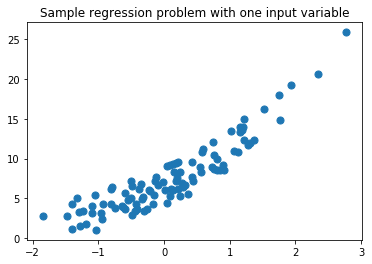

In [7]:
#Create some fake data
X = np.random.randn(100)
y = (X+2)**2 + 5*np.random.random(len(X))
plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X,y, marker= 'o', s=50)
plt.show()

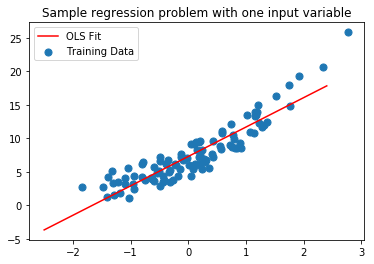

In [8]:
#Training a scikit learn model follows these simple steps.

#Import the classifier class we want
from sklearn.linear_model import LinearRegression

#Initialize a classifier object
#This will initiate it with defautl parameters 
cls = LinearRegression()

#Fit the model based on the training data
#First re-sahape X to be column rather than a flat array
X = X.reshape(-1,1)
cls.fit(X,y)

#And that's it! 
#We can now use the fitted model to make predictions
x_range = np.arange(-2.5,2.5,.1).reshape(-1,1)
y_pred = cls.predict(x_range)

#And we can plot this to see how well it matches
plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X,y, marker= 'o', s=50,label='Training Data')
plt.plot(x_range,y_pred,'r',label='OLS Fit')
plt.legend()


In [9]:
#We can also get the parameters of the fit
print('linear model coeff (w): {}'.format(cls.coef_))
print('linear model intercept (b): {:.3f}'.format(cls.intercept_))
print('R-squared score (training): {:.3f}'.format(cls.score(X, y)))
print('R-squared score (test): {:.3f}'.format(cls.score(X, y)))

linear model coeff (w): [4.39032649]
linear model intercept (b): 7.289
R-squared score (training): 0.828
R-squared score (test): 0.828


We can also use linear regression to fit higher order polynomials by mapping a single feature to higher order featuers.  That is, $y = \beta_0 + \beta_1 x$ becomes $y = \beta_0 + \beta_1 x + \beta_2 x^2$ where $x$ and $x^2$ are now treated as two unique features by the ordinary least squares model.

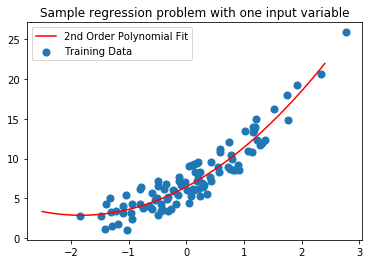

In [10]:
#Fit higher order polynomial features
from sklearn.preprocessing import PolynomialFeatures  
poly = PolynomialFeatures(degree = 2)

#Transform 
X_poly = poly.fit_transform(X) 

#Fit new model
lin2 = LinearRegression()
lin2.fit(X_poly,y)
y_pred2 = lin2.predict(poly.fit_transform(x_range))

#See if that matches data
plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X,y, marker= 'o', s=50,label='Training Data')
plt.plot(x_range,y_pred2,'r',label='2nd Order Polynomial Fit')
plt.legend()



In [11]:
#And find the fit parameters
print('linear model coeff (w): {}'.format(lin2.coef_))
print('linear model intercept (b): {:.3f}'.format(lin2.intercept_))
print('R-squared score (training): {:.3f}'.format(lin2.score(poly.fit_transform(X), y)))
print('R-squared score (test): {:.3f}'.format(lin2.score(poly.fit_transform(X), y)))

linear model coeff (w): [0.         3.89130886 1.06206971]
linear model intercept (b): 6.457
R-squared score (training): 0.898
R-squared score (test): 0.898


The quadratic fit performed much better, which makes sense since the data was generated from a quadratic model to begin with. 

For these models we just trained and any scikit-learn models, it also can be useful to save a version of the trained model so we can re-use it elsewhere without having to reload the data and re-train the model.  This can be accomplished with they `pickle` module as follows.

In [14]:
#Save a copy of the trained polynomial model with pickle
import pickle

# Dump the trained model with Pickle
pkl_filename = 'Data/trained_poly_model.pkl'
# Open the file to save as pkl file
model_pkl = open(pkl_filename, 'wb')
pickle.dump(lin2, model_pkl)
# Close the pickle instances
model_pkl.close()

In [15]:
#Now wherever we have access to the pickeld file we can read back in the trained scikit model
my_model_pkl = open(pkl_filename, 'rb')
my_model = pickle.load(my_model_pkl)
print ("Loaded model :: ", my_model)

Loaded model ::  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


See https://dataaspirant.com/2017/02/13/save-scikit-learn-models-with-python-pickle/ for more of a primer on using pickle, which is useful for saving and storing many types of python objects, not just ML models. 

## Data Prep

### Data Reduction with PCA

Rather than use iris or mtcars data, lets look at an interesting sample data set of network traffic.  This data is from the Detection of [IoT Botnet Attacks dataset](https://archive.ics.uci.edu/ml/datasets/detection_of_IoT_botnet_attacks_N_BaIoT).  There is data for 9 IoT devices.  We will focus on one of these, SimpleHome XCS7 1003 WHT Security Camera, chosen because it has the most recent data (07-Jun-2018).

For this SimpleHome Camera, we have about 18,000 examples of normal traffic.  We also have sample attack data for two types of botnets: Mirai and BASHLITE.  Each of these attack types consists of 5 specific classes of attacks:

- <u>Mirai botnet attack types:</u> ack, scan, syn, udp, udpplain
- <u>BASHLITE botnet attack types:</u> combo, junk, scan, tcp, udp

There are 115 total features related to the flow of network traffic.  See link for full description of what these features represent.

One other note on the data.  Each attack class is a 30-100MB csv file, containing from 20k-100k data points.  To keep the data more managable, we've already narrowed the attack data to a csv file containing 2000 data points from each attack class (e.g. 2000 for Mirai ack, 2000 for Mirai scan, etc).  Hence we have 10k total Mirai attacks, and 10k total Bashlite attacks, or 20k total attack records.

In [ ]:
#Read in normal traffic
df_normal = pd.read_csv('Data/normal_traffic.csv')
print('Normal traffic has {} data points and {} features'.format(len(df_normal),
                                                                df_normal.shape[1]))
#Add label columns
df_normal['label'] = 'normal'
df_normal['attack_type'] = 'normal'
df_normal.head(3)

In [ ]:
#Read in attack data
df1 = pd.read_csv('Data/all_mirai_attacks.csv')
df1['label'] = 'attack'
df1['attack_type'] = 'mirai attack'
print('{} mirai attacks data points'.format(len(df1)))
df2 = pd.read_csv('Data/all_bashlite_attacks.csv')
df2['label'] = 'attack'
df2['attack_type'] = 'bashlite attack'
print('{} bashlite attacks data points'.format(len(df2)))

In [ ]:
#Combine into a single dataframe
df_all = pd.concat([df_normal,df1,df2])
print("We have n = {} records and p = {} features.".format(df_all.shape[0],df_all.shape[1]-2))
print('\nBreakdown by classes:')
df_all['label'].value_counts()

Now lets view the first two principle components with PCA.

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA


#Reduce features to 2 PCA components
#First, get just the feature values
X_labeled = df_all.drop(['label','attack_type'],axis=1)
#Scale all the features so they have mean of 0 and standard deviation of 1
X_labeled_scaled = preprocessing.StandardScaler().fit_transform(X_labeled)
#Convert this to a dataframe to facilitate plotting
X_labeled_scaled = pd.DataFrame(X_labeled_scaled,columns=X_labeled.columns)
#Now apply PCA
n_components = 2
pca = PCA(n_components=n_components)
X_labeled_reduced = pca.fit_transform(X_labeled_scaled)
X_labeled_reduced = pd.DataFrame(X_labeled_reduced)
X_labeled_reduced = X_labeled_reduced.add_prefix('PC_')
print('Using {} components accounts for {}% of variance.'.format(n_components,
                                                                 100*sum(pca.explained_variance_ratio_)))
print('Explained Variance Ratios of first two principle components:',pca.explained_variance_ratio_)

#add labels back in
df_labeled_reduced = X_labeled_reduced.copy()
df_labeled_reduced['label'] = df_all['label'].values
df_labeled_reduced['attack_type'] = df_all['attack_type'].values

#reduce to managable sample
df_labeled_sample = df_labeled_reduced.sample(frac=.02,random_state=0)

#Now plot
sns.FacetGrid(df_labeled_sample,hue="attack_type", size=6).map(plt.scatter, "PC_0", "PC_1").add_legend()

### Train-Test Splits

Scikit has built in tools to split data into training and test sets for testing and validation.

In [ ]:
#Split raw data into features (X) and target labels (y)
X = df_all.drop(['label','attack_type'],axis=1)
y = df_all['label']

In [ ]:
#Here is the process to create a train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0) 
#Don't need to include random_state, but useful to ensure we get the same results every time we run it
print('{} samples in training set ({:.0%}), {} samples in test set ({:.0%})'.format(len(y_train),len(y_train)/len(y),
                                                                                    len(y_test),len(y_test)/len(y)))

#By default, train_test_split will shuffle the data to ensure train and test sets each has same portion of each class
print('\nFraction of each class in the test set:')
y_test.value_counts()

As we see, the default is to split 25% into the test set.  We can adjust this fraction , e.g. `train_test_split(X,y,test_size=0.1)` to get 10% into test set.

For high dimension data like this, it also can be very helpful to reduce the data to a smaller number of features as a pre-processing step before running machine learning models.  As we'll see, this can greatly enhance the performance of many ML techniques, and also reduce the computational resources.  Lets also create a set of training and test data for reduced features.

It turns out, when we want a training set of reduced data, we FIRST have to split the full data into training and test sets, and THEN reduce the data using PCA or some other feature reduction technique.  If we scaled and reduced the data and then did a train-test split, then we will have **data leakage** of test data into training data.  A big no-no. So lets apply PCA feature reduction to the training-test split we've already created.

In [ ]:
#As prep for PCA, scale the data so all features have mean 0 and variance of 1
#NOTE: The scaling transform should be LEARNED from the training data, then applied as is to the test data.  
#We don't re-fit the scaler on the test data.  
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Now pick number of principle components to reduce down to.  5 is a good number.
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)
X_train_reduced = pca.transform(X_train_scaled)
X_train_reduced = pd.DataFrame(X_train_reduced)
X_train_reduced = X_train_reduced.add_prefix('PC_')

X_test_reduced = pca.transform(X_test_scaled)
X_test_reduced = pd.DataFrame(X_test_reduced)
X_test_reduced = X_test_reduced.add_prefix('PC_')

print('Note: Using {} PCA components accounts for {:.1%} of variance.'.format(n_components,
                                                                 sum(pca.explained_variance_ratio_)))

## Classification

Now that we have a training and test data, lets run various classification algorithms and see how they do.  For the first example (Multi-Layer Perceptrons), we'll step through the modeling in detail including basic model training, evaluation criteria, and parameter tuning with grid search validation.  Then we'll quickly run through several other classification algorithms and see which one does best.

#### Multi-Layer Perceptron Neural Nets

Lets start with a type of neural network classifier, multi-layer perceptrons (go big or go home).  

In [ ]:
#The basics of training an MLP model

#Load the package
from sklearn.neural_network import MLPClassifier

#Initialize a MLP Classifier object using default parameter values, call it cls
cls = MLPClassifier()

#Now fit the model on the training data
cls.fit(X_train,y_train)

#Now cls is a trained/fitted MLPClassifier object
#We can use to to make predictions off of the test data (X_test) and see how well it matches 
y_predict = cls.predict(X_test)

#Lets see how often the predictions match the actual labels
acc = sum(pd.Series(y_predict).reset_index(drop=True) == pd.Series(y_test).reset_index(drop=True)) / len(y_test)
print('Accuracy of trained MLP model on Test Set = {:.1%}'.format(acc))

So far so good.  Scikit also has several built in tools to help evaluate the performance of classifiers.  In addition to accuracy, there are many other measure we can use, including:

- Accuracy: What percentage of predictions match the test set
- ROC AUC: Area under the ROC curve, useful way to think about a binary classifier
- precision: Pr(Attack|"Attack"), where "Attack" means record is classified as an attack, and Attack means the record actually is an attack
- recall: Pr("Attack"|Attack), aka True Positive Rate (if attack is defined as positive)
- F1 score: harmonic mean of precision and recall, $F1 = 2\frac{precision \bullet recall}{precision + recall}$
- beta-f1 score: weighted harmonic mean of precision and recall.  This turns out to be a very useful metric in classification settings because the beta parameter roughly means that recall is $\beta$ times as important as precision.  This can be applicable to network security applications where a low recall (meaning we fail to catch actual attacks, aka false negative) can be much worse than a low precision (meaning we mis-classify normal traffic as an attack, aka false positive).  See [F-Score description](https://en.wikipedia.org/wiki/F1_score).  

In [ ]:
#Load the various classifier scoring functions
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Turns out for some of the scoring metrics, the outputs must be binary (0 or 1)
y_test_bin = (y_test == 'attack').replace({True:1,False:0})
y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})

#Now compute the various evaluation metrics
s1 = accuracy_score(y_test_bin,y_predict_bin)
s2 = roc_auc_score(y_test_bin,y_predict_bin)
s3 = precision_score(y_test,y_predict,pos_label = 'attack')
s4 = recall_score(y_test,y_predict,pos_label = 'attack')
s5 = f1_score(y_test,y_predict,pos_label = 'attack')
s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

score_names = ['Accuracy','ROC AUC','precision','recall','F1','F5']
df_scores = pd.DataFrame(columns=score_names)
df_scores.loc[0] = [s1,s2,s3,s4,s5,s6]
df_scores

In [ ]:
#We can also look at the confustion matrix, which shows following raw numbers:
#  [[TP  FP]
#    FN  TN]]
cm = confusion_matrix(y_test,y_predict,labels=['normal','attack'])
print(cm)
print('\nOut of {} attacks in test set, classifer failed to detect {}'.format(cm[1,1]+cm[1,0],cm[1,0]))

In [ ]:
#The classification report is also useful
print(classification_report(y_test,y_predict,digits=5))

So far we have been using the default parameters of the MLP classifier.  We can also tune the classifer parameters to try and achieve better performance.  The main parameter for MLP classifiers is the hidden layer sizes.  Lets define some possible values for this parameter then see which one does best.

In [ ]:
#This may take a couple minutes, get up and stretch

hidden_layer_sizes_vals = [(10),(10,10),(20),(20,20)]
#Length of tuple is number of layers; each value is number of neurons in that layer
#So (10,10) means two layers with 10 neurons each

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['Hidden Layer Sizes','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
for i,h in enumerate(hidden_layer_sizes_vals):
    print('Training model # {} of {}'.format(i+1,len(hidden_layer_sizes_vals)))
    nn = MLPClassifier(hidden_layer_sizes=h)
    nn.fit(X_train,y_train)
    y_predict = nn.predict(X_test)
    
    #find binary output vectors, which are needed for roc_auc_score
    y_test_bin = (y_test == 'attack').replace({True:1,False:0})
    y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})
    
    #find scores
    s1 = accuracy_score(y_test_bin,y_predict_bin)
    s2 = roc_auc_score(y_test_bin,y_predict_bin)
    s3 = precision_score(y_test,y_predict,pos_label = 'attack')
    s4 = recall_score(y_test,y_predict,pos_label = 'attack')
    s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
    s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

    #Record Results
    df_scores.loc[i] = [h,s1,s2,s3,s4,s5,s6]

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

So far we trained on the full data set with all 115 features.  We can also try to train the models on the reduced data which contains only the 5 principle components.  

In [ ]:
#Train on PCA-REDUCED data

hidden_layer_sizes_vals = [(10),(10,10),(20),(20,20)]
#Length of tuple is number of layers; each value is number of neurons in that layer
#So (10,10) means two layers with 10 neurons each

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['Hidden Layer Sizes','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
for i,h in enumerate(hidden_layer_sizes_vals):
    print('Training model # {} of {}'.format(i+1,len(hidden_layer_sizes_vals)))
    nn = MLPClassifier(hidden_layer_sizes=h)
    nn.fit(X_train_reduced,y_train)
    y_predict = nn.predict(X_test_reduced)
    
    #find binary output vectors, which are needed for roc_auc_score
    y_test_bin = (y_test == 'attack').replace({True:1,False:0})
    y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})
    
    #find scores
    s1 = accuracy_score(y_test_bin,y_predict_bin)
    s2 = roc_auc_score(y_test_bin,y_predict_bin)
    s3 = precision_score(y_test,y_predict,pos_label = 'attack')
    s4 = recall_score(y_test,y_predict,pos_label = 'attack')
    s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
    s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

    #Record Results
    df_scores.loc[i] = [h,s1,s2,s3,s4,s5,s6]

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

Turns out that the model performed better when trained on reduced data.  It always strikes me as odd and counterintuitive that training on LESS INFORMATION (recall the first 5 components only accounted for 68% of the variance in the features) led to BETTER results.  By allowing the model to train on the most relevant information, turns out we can actually improved performance.  Moving forward we will train all subsequent models on the PCA-reduced data.

In [ ]:
#Before moving on, grab the best performance (the one that does best on F5 score, F score with beta = 5)
best_scores = df_scores[score_names].iloc[0].tolist()
best_scores_dict = {'MLP':best_scores}
best_scores_dict

#### Logistic Regression

Parameter Tuning:
- C = regularization parameter.  Small C (.1) for more shrinkage/regularization; large C (100) for less.  More regularization would probably be useful when dealing with all 115 features. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Parameter values to evalutate
C_vals = [.01,.1,1,10,100]

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['C','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
for i,c in enumerate(C_vals):
    print('Training model # {} of {}'.format(i+1,len(C_vals)))
    cls = LogisticRegression(C=c)
    cls.fit(X_train_reduced,y_train)
    y_predict = cls.predict(X_test_reduced)
    
    #find binary output vectors, which are needed for roc_auc_score
    y_test_bin = (y_test == 'attack').replace({True:1,False:0})
    y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})
    
    #find scores
    s1 = accuracy_score(y_test_bin,y_predict_bin)
    s2 = roc_auc_score(y_test_bin,y_predict_bin)
    s3 = precision_score(y_test,y_predict,pos_label = 'attack')
    s4 = recall_score(y_test,y_predict,pos_label = 'attack')
    s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
    s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

    #Record Results
    df_scores.loc[i] = [c,s1,s2,s3,s4,s5,s6]

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

In [ ]:
#Record results
best_scores = df_scores[score_names].iloc[0].tolist()
best_scores_dict['Logistic Regression'] = best_scores

#### Random Forest

Parameter tuning:
- max_depth: how many splits to conduct per tree
- criterion = ['gini','entropy], criteria to evaluate quality of a split at distinguishing between classes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Parameter values to evalutate
criterion_vals = ['gini','entropy']
max_depth_vals = [3,5]

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['criterion','max_depth','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
i = 0
for c in criterion_vals:
    for d in max_depth_vals:
        print('Training model # {}'.format(i+1))
        cls = RandomForestClassifier(criterion=c,max_depth=d)
        cls.fit(X_train_reduced,y_train)
        y_predict = cls.predict(X_test_reduced)

        #find binary output vectors, which are needed for roc_auc_score
        y_test_bin = (y_test == 'attack').replace({True:1,False:0})
        y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})

        #find scores
        s1 = accuracy_score(y_test_bin,y_predict_bin)
        s2 = roc_auc_score(y_test_bin,y_predict_bin)
        s3 = precision_score(y_test,y_predict,pos_label = 'attack')
        s4 = recall_score(y_test,y_predict,pos_label = 'attack')
        s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
        s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

        #Record Results
        df_scores.loc[i] = [c,d,s1,s2,s3,s4,s5,s6]
        i += 1

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

In [ ]:
#Record results
best_scores = df_scores[score_names].iloc[0].tolist()
best_scores_dict['Random Forest'] = best_scores

In [ ]:
#Another good thing about random forests is that we get the feature importance
features = X_train_reduced.columns
feature_importances = cls.feature_importances_
feature_ser = pd.Series(feature_importances,index=features)
feature_ser.sort_values(ascending=False).iloc[:15]

#Here it's just showing that the 1st principle compoment is most important, as expected
#If we trained on real feature names this would be more useful

#### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Parameter values to evalutate
criterion_vals = ['gini','entropy']
max_depth_vals = [3,5]

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['criterion','max_depth','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
i = 0
for c in criterion_vals:
    for d in max_depth_vals:
        print('Training model # {}'.format(i+1))
        cls = DecisionTreeClassifier(criterion=c,max_depth=d)
        cls.fit(X_train_reduced,y_train)
        y_predict = cls.predict(X_test_reduced)

        #find binary output vectors, which are needed for roc_auc_score
        y_test_bin = (y_test == 'attack').replace({True:1,False:0})
        y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})

        #find scores
        s1 = accuracy_score(y_test_bin,y_predict_bin)
        s2 = roc_auc_score(y_test_bin,y_predict_bin)
        s3 = precision_score(y_test,y_predict,pos_label = 'attack')
        s4 = recall_score(y_test,y_predict,pos_label = 'attack')
        s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
        s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

        #Record Results
        df_scores.loc[i] = [c,d,s1,s2,s3,s4,s5,s6]
        i += 1

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

In [ ]:
#Record results
best_scores = df_scores[score_names].iloc[0].tolist()
best_scores_dict['Decision Tree'] = best_scores

#### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Parameter values to evalutate: number of neighbors used to assess most common class among neighbors
k_vals = [3,5,10,15]

#Initiate dataframe to hold all scores
df_scores = pd.DataFrame(columns=['k','Accuracy','ROC AUC','precision','recall','F1','F5'])

#Now see how they all do!
i = 0
for k in k_vals:
    print('Training model # {}'.format(i+1))
    cls = KNeighborsClassifier(n_neighbors=k)
    cls.fit(X_train_reduced,y_train)
    y_predict = cls.predict(X_test_reduced)

    #find binary output vectors, which are needed for roc_auc_score
    y_test_bin = (y_test == 'attack').replace({True:1,False:0})
    y_predict_bin = (pd.Series(y_predict) == 'attack').replace({True:1,False:0})

    #find scores
    s1 = accuracy_score(y_test_bin,y_predict_bin)
    s2 = roc_auc_score(y_test_bin,y_predict_bin)
    s3 = precision_score(y_test,y_predict,pos_label = 'attack')
    s4 = recall_score(y_test,y_predict,pos_label = 'attack')
    s5 = fbeta_score(y_test,y_predict,beta=1,pos_label = 'attack')
    s6 = fbeta_score(y_test,y_predict,beta=5,pos_label = 'attack')

    #Record Results
    df_scores.loc[i] = [k,s1,s2,s3,s4,s5,s6]
    i += 1

df_scores.sort_values('F5',ascending=False,inplace=True)
df_scores

In [ ]:
#Record results
best_scores = df_scores[score_names].iloc[0].tolist()
best_scores_dict['KNN'] = best_scores

##### Check out classifier results

In [ ]:
best_scores_dict.keys()

In [ ]:
df_all_scores = pd.DataFrame(data=best_scores_dict,index=score_names).transpose()
df_all_scores.sort_values(by='Accuracy',ascending=False,inplace=True)
df_all_scores

Turns out KNN performed the best (in terms of F5 score, or F-beta score with beta = 5), though all classifiers did very well.  

### Cross Validation with GridSearch

In the above example, we manually searched through different parameter values.  Scitkit has many tools that automate this task for us.  One very useful one is GridSearchCV which can tune the parameters of any classifier using cross validation.

Here's how it would have worked for the Random Forest model.

In [ ]:
from sklearn.model_selection import GridSearchCV

Since GridSearchCV performs its own cross validation, we can feed it the entire data set instead of just the training set, since each fold of the data acts as its own training-test split.  However one caution with GridSearch is that it doesn't automatically shuffle the data, so you'll want to shuffle it before feeding it in to make sure the training sets always contain a mix of all classes.

In [ ]:
print(5)

In [ ]:
#Mix the data up
df_all = df_all.sample(frac=1)
#Now grab feature data and target vector
X = df_all.drop(['label','attack_type'],axis=1)
y = df_all.label

#Optionally scale and reduce the data back to 5 PCA dimensions
# X_scaled = preprocessing.StandardScaler().fit_transform(X)
# #Now apply pca
# n_components = 5
# pca = PCA(n_components=n_components)
# X_reduced = pca.fit_transform(X_scaled)

In [ ]:
#Initialize classifier object
cls = RandomForestClassifier(n_estimators=10)

#Define parameters to cycle through
criterion_vals = ['gini','entropy']
max_depth_vals = [3,5]

#Set up GridSearchCV object
num_folds = 4 #number of cross validation folds
grid_values = {'criterion':criterion_vals,'max_depth':max_depth_vals}
grid_clf = GridSearchCV(cls,param_grid=grid_values,cv=num_folds)

#Now fit it based on the full data set
#GridSearch will automatically split the data set into folds
grid_clf.fit(X,y)
print('Best parameters:',grid_clf.best_params_)
print('Best score:',grid_clf.best_score_)

#Takes a minute or two to run

This was an easy way to evaluate many parameters and find the best ones.  By default GridSearchCV uses accuracy to determine the best one, but we could also adjust that using scoring argument, which can take following options: ['f1-weighted','accuracy' (default),'roc_auc','recall','recall_micro'].  

In [ ]:
#Note that we can also retrieve the best classifier object as follows:
best_cls = grid_clf.best_estimator_
best_cls

## Unsupervised Learning / Clustering

Even when we don't have output values (y), and we only have inputs/features (X), simply clustering the data can be an insightful way to explore the data, identify patterns, or detect anomalies.  

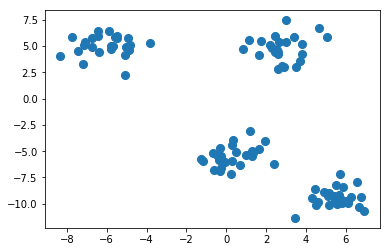

In [3]:
#Create some fake data
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 10,centers=4)
plt.scatter(X[:, 0], X[:, 1], s=65)

Start with K-Means clustering, a common clutering approach where points are initially assigned to some initial random clusters, then points are repeatedly assigned to whichever cluster a majority of their neighbors belong to until no points change cluster.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


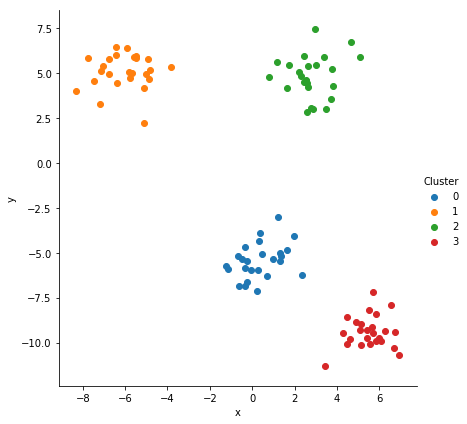

In [4]:
#Import KMeans class
from sklearn.cluster import KMeans

#Load and fit a model
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
#Get the labels for each point
labels = kmeans.labels_

#And that's it!  See the reulting clusters
df = pd.DataFrame({'x':X[:,0],'y':X[:,1],'Cluster':labels})
sns.FacetGrid(df,hue="Cluster",size=6).map(plt.scatter, "x", "y").add_legend()

Of course, we don't always know ahead of time how many clusters we are going to have.  A common approach is to try increasing the number of clusters in KMeans until you no longer see a significant decrease in the within cluster sum of squares (WCSS), a measure of the overall quality of the resulting cluster assignment.

In [ ]:
# Find the optimum number of clusters for k-means classification
n_cluster_vals = np.arange(1,11) # user specified, you can experiment...
wcss = [] #Will hold within cluster sum of squares for each n_clusters

for i in n_cluster_vals:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(5,5))
plt.plot(n_cluster_vals, wcss)
plt.title('Using the elbow method to select number of clusters in KMeasn')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

This approach is called the "elbow method" because we see an elbow at the point where the WCSS measure of quality of fit no longer decreases with each additional cluster.

Another common clustering method is Agglomerative Clustering, where every point starts as its own cluster, then points that are most similar are grouped together until some stopping criteria is me. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=65,c=cls_assignment)


Agglomerative clustering are also useful for viewing the dendorgram tree-like structures showing how individual objects/data points on the bottom are combined/agglomerated into clusters as we move up.

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

Density based clustering, where points either classified as part of a cluster or outliers depending on the density of points in their vicinity, is another popular clustering technique.  It is used widely in anomaly detection.  A popular method for density-based scanning is DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 2, min_samples = 2)
cls_assignment = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=65,c=cls_assignment)


Of course this just scratches the surface of clustering techniques.  For a great overview of the theory behind these and other clustering techniques, see the two Clustering chapters in [Data Mining: Concepts and Techniques, 3rd Edition](https://learning.oreilly.com/library/view/data-mining-concepts/9780123814791/).  For a guide and examples of how to implement the algorithms, scitkit has many great [clustering examples](https://scikit-learn.org/stable/auto_examples/index.html#cluster-examples) on its website.  



# Other Data Analysis Tools

### Natural Language Processing with nltk

[NLTK](https://www.nltk.org/) is the main python library for natural language processing and text analysis is nltk (natural language toolkit).  To learn more, I'd recommend teh Coursera course [Applied Text Mining in Python](https://www.coursera.org/learn/python-text-mining?specialization=data-science-python), or the O'Reily book [Applied Text Analysis with Python](https://learning.oreilly.com/library/view/applied-text-analysis/9781491963036/) by Bengfort, Bilbro, and Ojeda is also very good.  Both give a good overview of nltk and related libraries, such as gensim which is used for topic modeling.

### Network Analysis with networkx

Newtorkx has many powerful tools for the analysis, visualization, and any types of networks.  For a good primer I'd again recommend the coursera course [Applied Social Network Analysis in Python](https://www.coursera.org/learn/python-text-mining?specialization=data-science-python), or see the [documentation](https://networkx.github.io/documentation/stable/tutorial.html) for a good tutorial.  

### Statistical Modeling and Time Series Analysis with statsmodel

The [statsmodel](https://www.statsmodels.org/stable/index.html) package has a wealth of statistical analysis tools, including regression models, Analysis of Variance (ANOVA), time series analysis (AR, ARIMA, etc), Kernel density estimation, and more.  

Here is a good example using statsmodel for ARIMA time series analysis: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/.  

### Optimization

The [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html) libary has many built in methods for general optimization problems.  I also like the [cvxpy](https://www.cvxpy.org/) package since it has some added functionality.  For example, cvxpy makes it easier to conduct integer or binary programming where decision variables must be integers (or must be 0 or 1). 

### Simulation

In general, most typical simulation in python is done with for loops.  However, there are some packages for more intense simulation work, such as [SimPy](https://realpython.com/simpy-simulating-with-python/).

### Association Analysis

Association analysis, which aims to find correlations and linkages in large datasets, is arguably an under-utilized data mining tool since it tends to fall outside the bounds of machine learning, which is all anyone cares about these days.  Here's a good article on implementing association analysis with teh mlextend library: https://pbpython.com/market-basket-analysis.html.  